In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [4]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [5]:
df.columns = df.columns.str.strip()
df['Date'] = df['Date'].str.strip()

In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [7]:
df = df.sort_values('Date')

In [8]:
df['Other'].fillna(df['Other'].median(), inplace=True)#filling missing values in 'Other' with median

df["DayIndex"] = (df["Date"] - df["Date"].min()).dt.days

/tmp/ipython-input-4288768712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Other'].fillna(df['Other'].median(), inplace=True)#filling missing values in 'Other' with median


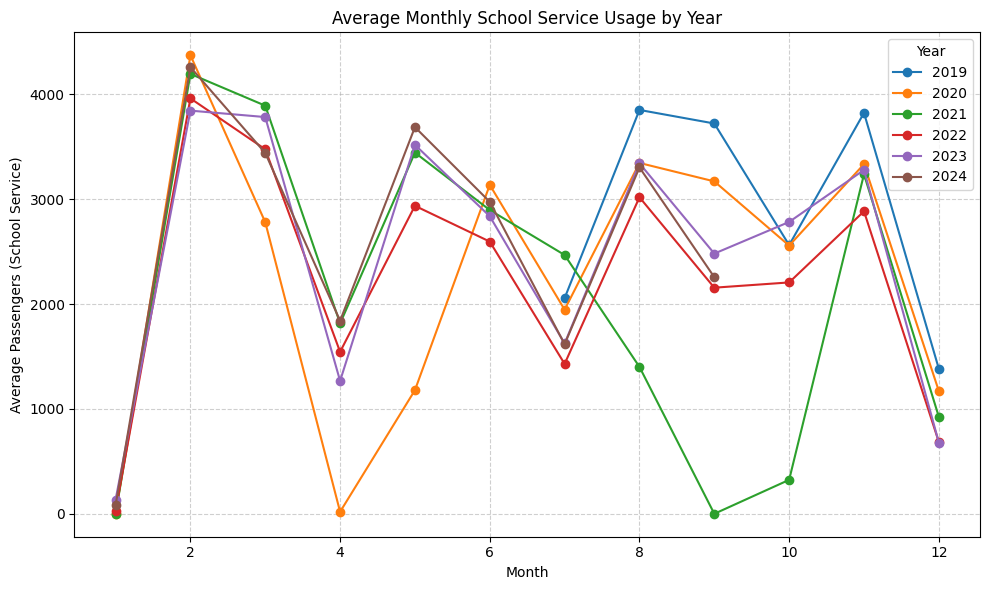

In [9]:

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

school_usage = df.groupby(["Year", "Month"])["School"].mean().reset_index()

plt.figure(figsize=(10,6))
for year in school_usage["Year"].unique():
    yearly_data = school_usage[school_usage["Year"] == year]
    plt.plot(yearly_data["Month"], yearly_data["School"], marker='o', label=str(year))

plt.title("Average Monthly School Service Usage by Year")
plt.xlabel("Month")
plt.ylabel("Average Passengers (School Service)")
plt.legend(title="Year")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

       Local Route  Light Rail  Peak Service  Rapid Route   School  Other
Month                                                                    
1          7238.00     6025.83        143.13     10121.33    48.77  32.10
2         12770.92     8840.41        222.87     15672.89  4130.33  54.37
3         11670.94     8121.96        210.25     14689.60  3475.57  54.37
4          8107.33     6312.37        154.42     10724.24  1297.63  42.23
5         10167.54     7090.46        181.28     12285.85  2953.90  53.90
6          9870.98     7054.33        176.21     12116.39  2888.98  42.46
7         10096.13     7558.56        197.83     13161.49  1857.60  40.89
8         10881.24     7526.49        192.05     13647.12  3044.35  44.42
9          9195.37     6620.86        165.86     11782.75  2298.51  38.80
10         9346.30     6872.50        169.08     12308.61  2087.23  39.01
11        11071.32     7763.21        200.71     13694.45  3312.83  45.97
12         8370.91     6631.77        

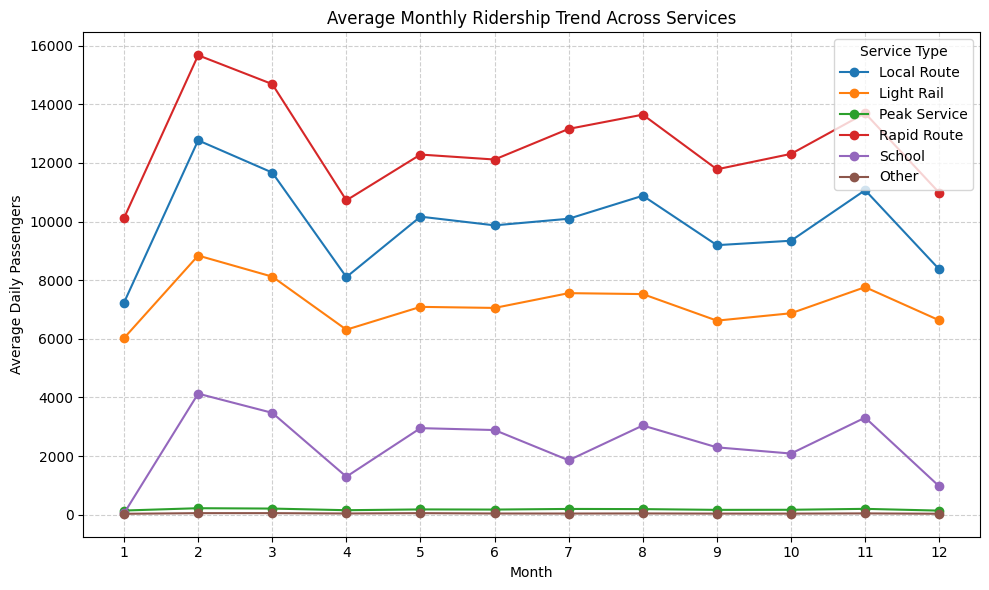

In [11]:

df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
monthly_pattern = df.groupby("Month")[["Local Route", "Light Rail", "Peak Service", "Rapid Route", "School", "Other"]].mean()

print(monthly_pattern.round(2))

plt.figure(figsize=(10,6))
for col in monthly_pattern.columns:
    plt.plot(monthly_pattern.index, monthly_pattern[col], marker='o', label=col)

plt.title("Average Monthly Ridership Trend Across Services")
plt.xlabel("Month")
plt.ylabel("Average Daily Passengers")
plt.xticks(range(1,13))
plt.legend(title="Service Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


===== Average Ridership by Weekday =====
              Local Route  Light Rail  Peak Service  Rapid Route   School  \
Weekday_Name                                                                
Monday           11444.68     7541.55        235.68     13858.82  3014.36   
Tuesday          13243.07     8591.72        281.73     15949.74  3454.28   
Wednesday        13378.53     8620.36        281.75     15995.65  3504.24   
Thursday         13166.71     8515.22        255.06     15740.03  3369.96   
Friday           12543.76     8510.23        202.85     14942.16  3125.80   
Saturday          3271.16     5000.98          0.00      6640.74     0.15   
Sunday            2191.87     3588.07          0.00      5053.36     0.07   

              Other  
Weekday_Name         
Monday        44.41  
Tuesday       52.25  
Wednesday     56.16  
Thursday      58.27  
Friday        54.70  
Saturday      19.69  
Sunday        18.01  


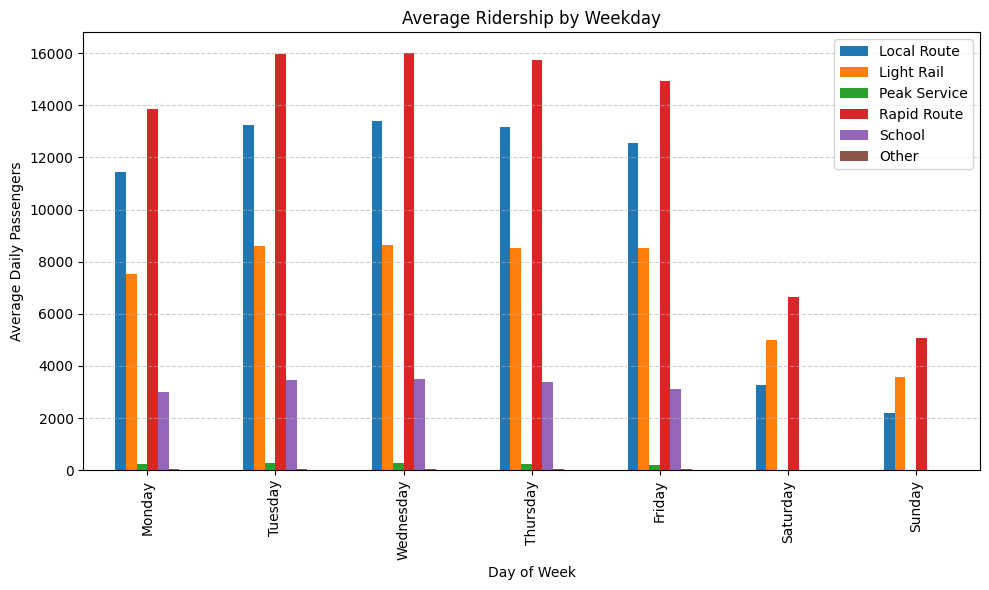

In [13]:

df["Weekday_Name"] = df["Date"].dt.day_name()

weekday_pattern = df.groupby("Weekday_Name")[["Local Route", "Light Rail", "Peak Service", "Rapid Route", "School", "Other"]].mean()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_pattern = weekday_pattern.reindex(weekday_order)
print("===== Average Ridership by Weekday =====")
print(weekday_pattern.round(2))

weekday_pattern.plot(kind="bar", figsize=(10,6))
plt.title("Average Ridership by Weekday")
plt.ylabel("Average Daily Passengers")
plt.xlabel("Day of Week")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


      Local Route  Light Rail  Peak Service  Rapid Route  School  Other
Year                                                                   
2019        29.55       21.78          0.65        41.51    6.50   0.02
2020        31.07       20.83          0.54        38.97    8.50   0.08
2021        32.34       21.23          0.54        37.73    7.97   0.18
2022        30.81       22.80          0.46        38.24    7.51   0.18
2023        29.73       23.57          0.58        39.35    6.61   0.16
2024        30.71       22.89          0.58        38.82    6.84   0.16


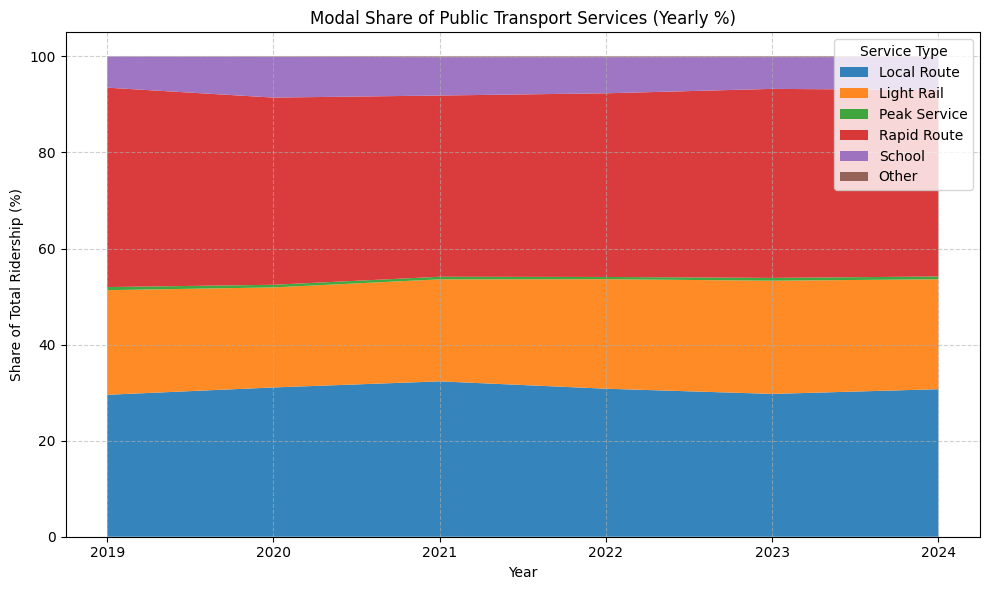

In [14]:
yearly_avg = df.groupby("Year")[["Local Route", "Light Rail", "Peak Service", "Rapid Route", "School", "Other"]].mean()
yearly_avg["Total"] = yearly_avg.sum(axis=1)
modal_share = (yearly_avg.iloc[:, :-1].div(yearly_avg["Total"], axis=0)) * 100
print(modal_share.round(2))

plt.figure(figsize=(10,6))
plt.stackplot(modal_share.index,
              *[modal_share[col] for col in modal_share.columns],
              labels=modal_share.columns, alpha=0.9)
plt.title("Modal Share of Public Transport Services (Yearly %)")
plt.xlabel("Year")
plt.ylabel("Share of Total Ridership (%)")
plt.legend(title="Service Type", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


**FORECASTING**

/tmp/ipython-input-2796843843.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Other"].fillna(df["Other"].median(), inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/

        Date  Predicted_Ridership
0 2024-09-30              43068.0
1 2024-10-01              43071.0
2 2024-10-02              43074.0
3 2024-10-03              43077.0
4 2024-10-04              43080.0
5 2024-10-05              15317.0
6 2024-10-06              15319.0


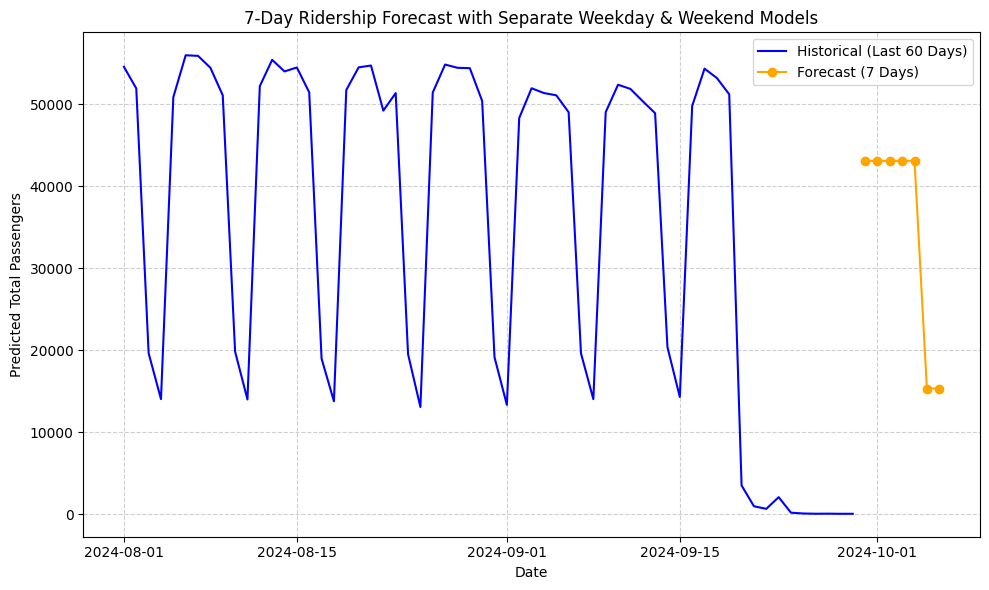

In [15]:

file_path = "Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()
df["Date"] = df["Date"].str.strip()
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df = df.sort_values("Date")
df["Other"].fillna(df["Other"].median(), inplace=True)

df["Total_Ridership"] = df[["Local Route", "Light Rail", "Peak Service",
                            "Rapid Route", "School", "Other"]].sum(axis=1)

df["DayIndex"] = (df["Date"] - df["Date"].min()).dt.days
df["Weekday"] = df["Date"].dt.dayofweek  # 0 = Monday ... 6 = Sunday

weekday_data = df[df["Weekday"] < 5]
weekend_data = df[df["Weekday"] >= 5]

def train_and_predict(subset, name):
    X = subset[["DayIndex"]]
    y = subset["Total_Ridership"]
    model = LinearRegression()
    model.fit(X, y)
    return model

weekday_model = train_and_predict(weekday_data, "Weekday")
weekend_model = train_and_predict(weekend_data, "Weekend")


last_day_index = df["DayIndex"].max()
future_days = 7
future_idx = np.arange(last_day_index + 1, last_day_index + 1 + future_days)
future_dates = pd.date_range(df["Date"].max() + pd.Timedelta(days=1), periods=future_days)

future_df = pd.DataFrame({"Date": future_dates})
future_df["DayIndex"] = future_idx
future_df["Weekday"] = future_df["Date"].dt.dayofweek

preds = []
for _, row in future_df.iterrows():
    if row["Weekday"] < 5:
        preds.append(weekday_model.predict([[row["DayIndex"]]])[0])
    else:
        preds.append(weekend_model.predict([[row["DayIndex"]]])[0])

future_df["Predicted_Ridership"] = preds


print(future_df[["Date", "Predicted_Ridership"]].round(0))

plt.figure(figsize=(10,6))
plt.plot(df["Date"].tail(60), df["Total_Ridership"].tail(60), label="Historical (Last 60 Days)", color="blue")
plt.plot(future_df["Date"], future_df["Predicted_Ridership"], marker="o", color="orange", label="Forecast (7 Days)")
plt.title("7-Day Ridership Forecast with Separate Weekday & Weekend Models")
plt.xlabel("Date")
plt.ylabel("Predicted Total Passengers")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
